In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('cancer_classification.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

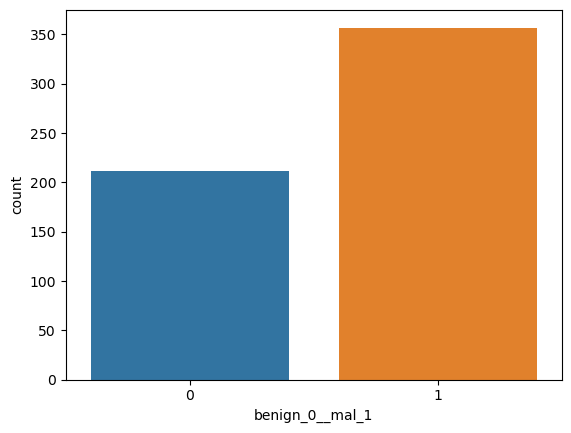

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

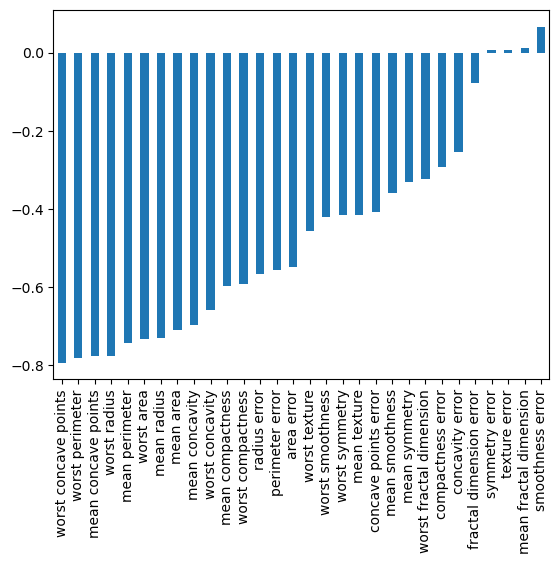

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

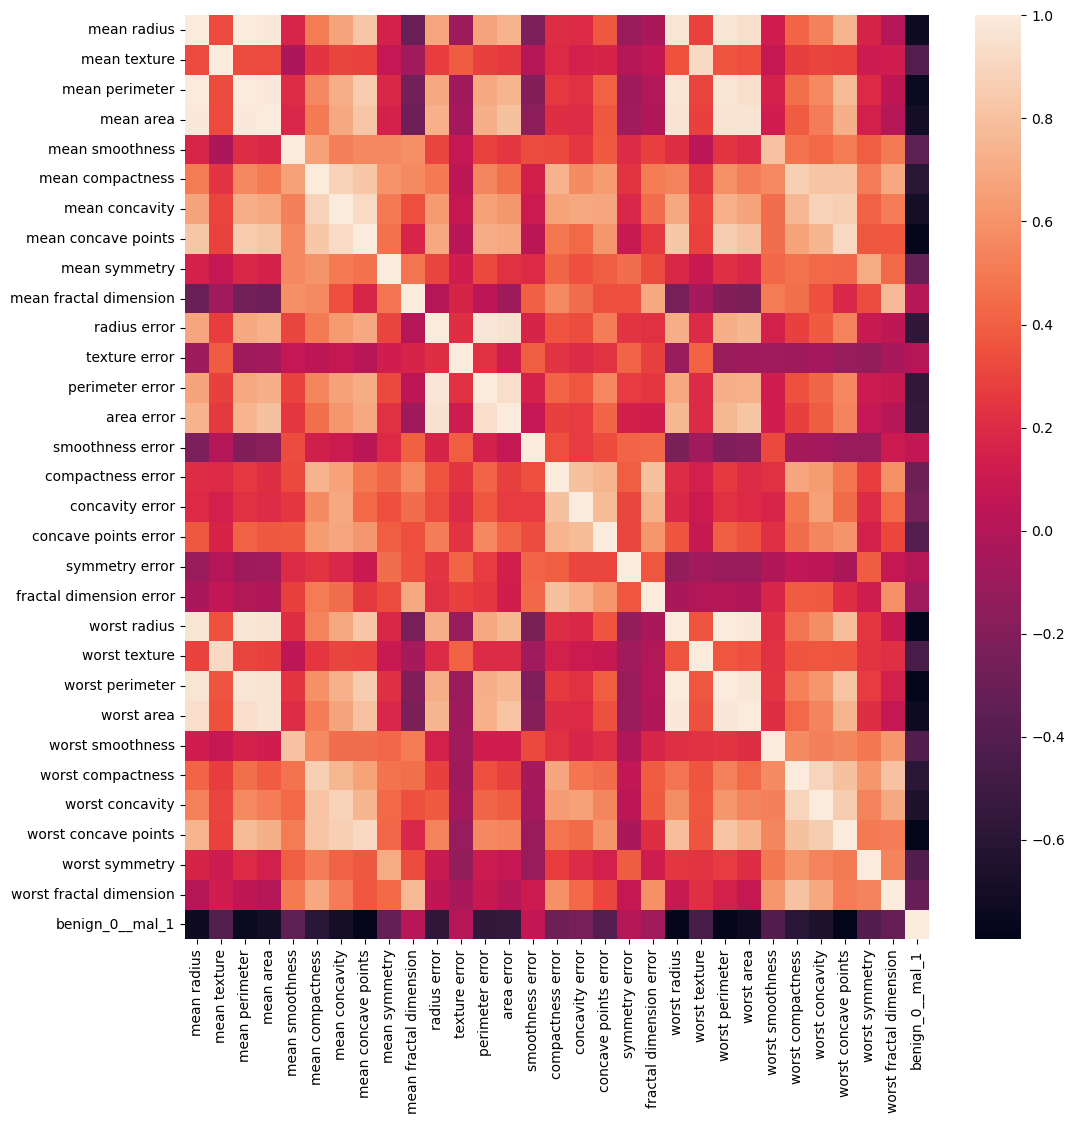

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

# Data Preprocessing

In [15]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

# Modelling with Dropout and Early Callbacks

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2023-10-16 17:23:17.657024: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 25ms/step - loss: 0.6884 - val_loss: 0.6791
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6640 - val_loss: 0.6550
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6343 - val_loss: 0.6265
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6021 - val_loss: 0.5892
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5606 - val_loss: 0.5430
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5125 - val_loss: 0.4916
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4611 - val_loss: 0.4363
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4107 - val_loss: 0.3847
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3631 - val_loss: 0.3401
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3227 - val_loss: 0.3008
Epoch 

14/14 [==============================] - 0s 8ms/step - loss: 0.0542 - val_loss: 0.1216
Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0515 - val_loss: 0.1140
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0517 - val_loss: 0.1210
Epoch 85/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0591 - val_loss: 0.1136
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0532 - val_loss: 0.1126
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0496 - val_loss: 0.1231
Epoch 88/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0509 - val_loss: 0.1145
Epoch 89/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0578 - val_loss: 0.1130
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0526 - val_loss: 0.1194
Epoch 91/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0488 - val_loss: 0.1130
Epoch 9

14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - val_loss: 0.1327
Epoch 164/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0395 - val_loss: 0.1474
Epoch 165/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0422 - val_loss: 0.1360
Epoch 166/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0396 - val_loss: 0.1421
Epoch 167/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0408 - val_loss: 0.1323
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0437 - val_loss: 0.1398
Epoch 169/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0400 - val_loss: 0.1359
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0419 - val_loss: 0.1316
Epoch 171/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0397 - val_loss: 0.1407
Epoch 172/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0421 - val_loss: 0.1372


14/14 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.1561
Epoch 245/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0383 - val_loss: 0.1523
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: 0.1719
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0367 - val_loss: 0.1538
Epoch 248/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0366 - val_loss: 0.1660
Epoch 249/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0384 - val_loss: 0.1522
Epoch 250/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0415 - val_loss: 0.1608
Epoch 251/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0352 - val_loss: 0.1593
Epoch 252/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0348 - val_loss: 0.1592
Epoch 253/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0348 - val_loss: 0.1700
Ep

Epoch 325/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.1925
Epoch 326/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0306 - val_loss: 0.1903
Epoch 327/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0286 - val_loss: 0.2004
Epoch 328/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0298 - val_loss: 0.1993
Epoch 329/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0285 - val_loss: 0.1937
Epoch 330/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.2026
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.1898
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.1974
Epoch 333/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0354 - val_loss: 0.2006
Epoch 334/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0291 - val_

Epoch 406/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0241 - val_loss: 0.2390
Epoch 407/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0231 - val_loss: 0.2278
Epoch 408/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0240 - val_loss: 0.2506
Epoch 409/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0241 - val_loss: 0.2407
Epoch 410/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0241 - val_loss: 0.2394
Epoch 411/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0239 - val_loss: 0.2306
Epoch 412/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.2459
Epoch 413/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0234 - val_loss: 0.2397
Epoch 414/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0238 - val_loss: 0.2338
Epoch 415/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0252 - v

Epoch 487/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.2826
Epoch 488/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.2887
Epoch 489/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0202 - val_loss: 0.2830
Epoch 490/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0208 - val_loss: 0.2857
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.3178
Epoch 492/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0225 - val_loss: 0.2746
Epoch 493/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0205 - val_loss: 0.3002
Epoch 494/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0199 - val_loss: 0.2797
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.2995
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0198 - val_l

Epoch 568/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0190 - val_loss: 0.3348
Epoch 569/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0210 - val_loss: 0.3344
Epoch 570/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0171 - val_loss: 0.3407
Epoch 571/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0179 - val_loss: 0.3321
Epoch 572/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0194 - val_loss: 0.3610
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.3159
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.3434
Epoch 575/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0179 - val_loss: 0.3274
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.3525
Epoch 577/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0167 - val_

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses

,loss,val_loss
0,0.688411,0.679081
1,0.663997,0.655007
2,0.634251,0.626528
3,0.602098,0.589199
4,0.560566,0.542967
...,...,...
595,0.015232,0.366248
596,0.019084,0.332792
597,0.015515,0.372885
598,0.014922,0.335655


<AxesSubplot:>

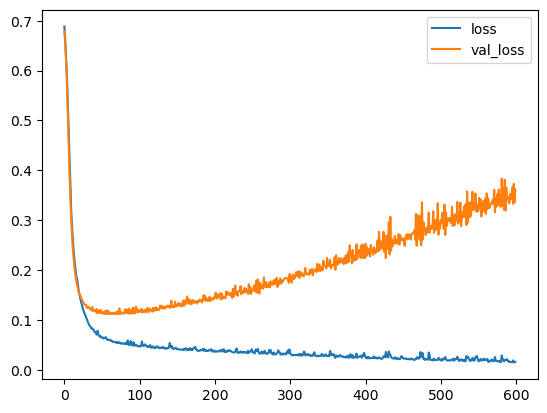

In [30]:
losses.plot()

The divergence between val_loss and loss functions are a sign of overfitting our model to the training data.